In [14]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA

from utils.face_functions import face_to_vec

IMG_PATH = '../../images2/'
TEST_IMG_PATH = '../../test_photos/'
TEST_DF_FILE = 'test_faces_df.pkl'
DF_FILE = 'faces_df.pkl'

### Zdjęcia aktorów

In [15]:
if os.path.exists(DF_FILE):
    faces_df = pd.read_pickle(DF_FILE)
else:
    photo_files = os.listdir(IMG_PATH)
    people_df = pd.DataFrame({"files": photo_files})
    people_df["person"] = people_df.files.str.slice(0, -6).astype('catogory')
    people_df.set_index('person', inplace=True)
    people_df['code'] = people_df.files.apply(lambda img: face_to_vec(os.path.join(IMG_PATH, img)))
    codes = pd.DataFrame(np.vstack(people_df.code.values), index=people_df.index).add_prefix('v_')
    faces_df = pd.concat([people_df, codes], axis=1).drop(['code', 'files'], axis=1)
    faces_df.to_pickle(DF_FILE)

### Zdjęcia z kamerki

In [16]:
top_actors = photo_count[:50].index
top_faces = faces_df.loc[top_actors, 'v_0':]

### Zdjęcia aktorów

In [17]:
if os.path.exists(TEST_DF_FILE):
    test_faces_df = pd.read_pickle(TEST_DF_FILE)
else:
    photo_files = os.listdir(TEST_IMG_PATH)
    people_df = pd.DataFrame({"files": photo_files})
    people_df["person"] = people_df.files.str.slice(0, -6).astype('category')
    people_df.set_index('person', inplace=True)
    people_df['code'] = people_df.files.apply(lambda img: face_to_vec(os.path.join(TEST_IMG_PATH, img)))
    codes = pd.DataFrame(np.vstack(people_df.code.values), index=people_df.index).add_prefix('v_')
    test_faces_df = pd.concat([people_df, codes], axis=1).drop(['code', 'files'], axis=1)
    test_faces_df.to_pickle(TEST_DF_FILE)

In [23]:
photo_count = faces_df.groupby(faces_df.index).count().sort_values('v_0', ascending=False).v_0

top_actors = photo_count[:50].index
top_faces = faces_df.loc[top_actors, 'v_0':]

webcam_faces_df = test_faces_df.copy()

In [30]:
pca = PCA()
pca.fit(faces_df)
# pca.fit(top_faces)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [31]:
faces_components = pca.transform(top_faces)
top_pca = pd.DataFrame(faces_components[:, :2], index=top_faces.index, ).add_prefix('pca_').reset_index()
top_pca.person = top_pca.person.astype('object')
# top_pca['test'] = False

webcam_components = pca.transform(webcam_faces_df)
webcam_pca = pd.DataFrame(webcam_components[:, :2], index=webcam_faces_df.index, ).add_prefix('pca_').reset_index()
webcam_pca.person = webcam_pca.person.astype('object')
# webcam_pca['test'] = True

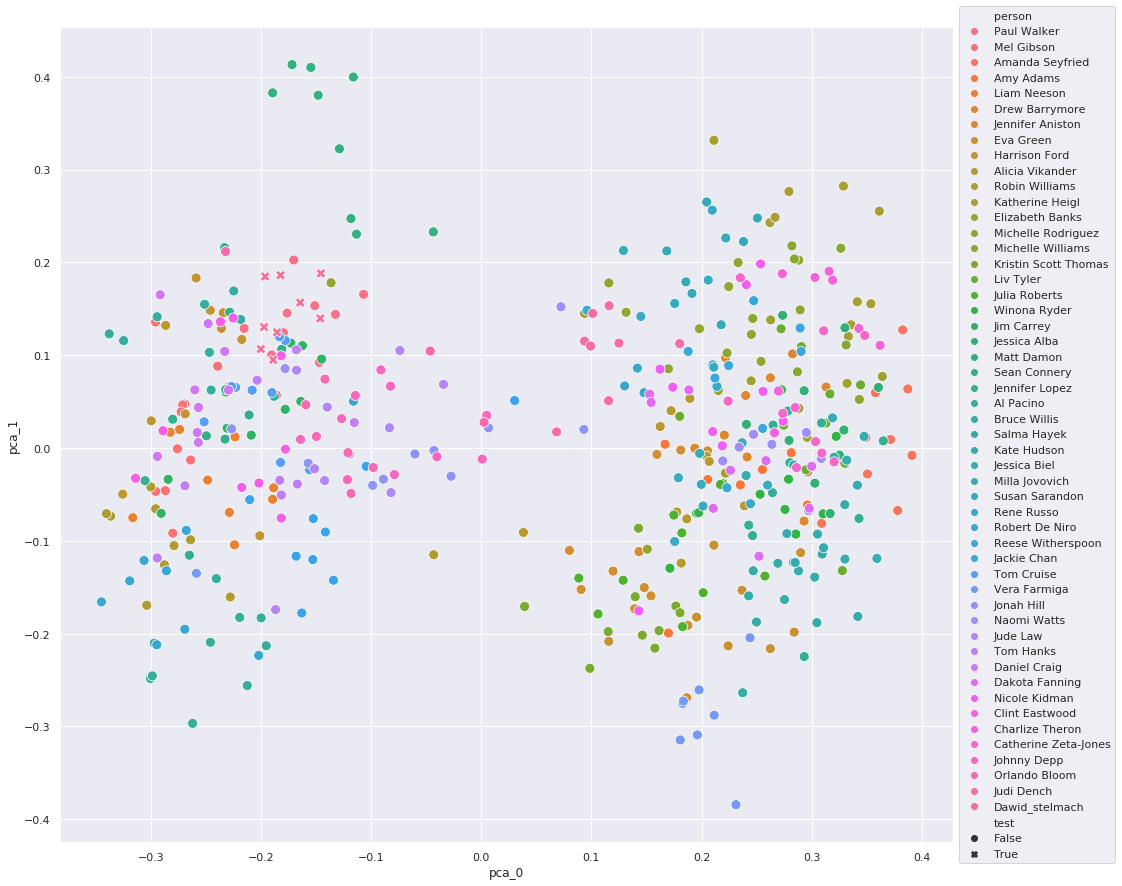

In [32]:
full_pca = pd.concat([top_pca, webcam_pca])

sns.set(rc={'figure.figsize':(20,15)})
ax = sns.scatterplot(data=full_pca, x='pca_0', y='pca_1', hue='person', s=100, style='test')
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [39]:
webcam_pca.head()

,person,pca_0,pca_1,test
0,Dawid_stelmach,-0.189003,0.094966,True
1,Dawid_stelmach,-0.196246,0.184779,True
2,Dawid_stelmach,-0.200198,0.106617,True
3,Dawid_stelmach,-0.197296,0.130332,True
4,Dawid_stelmach,-0.182341,0.186171,True


In [42]:
webcam_pca.iloc[1, 1]

-0.19624598924485567

In [ ]:
ax2.set_

In [ ]:
plt.ion()

for i in range(10):
plt.scatter(i, i)
plt.pause(0.5)



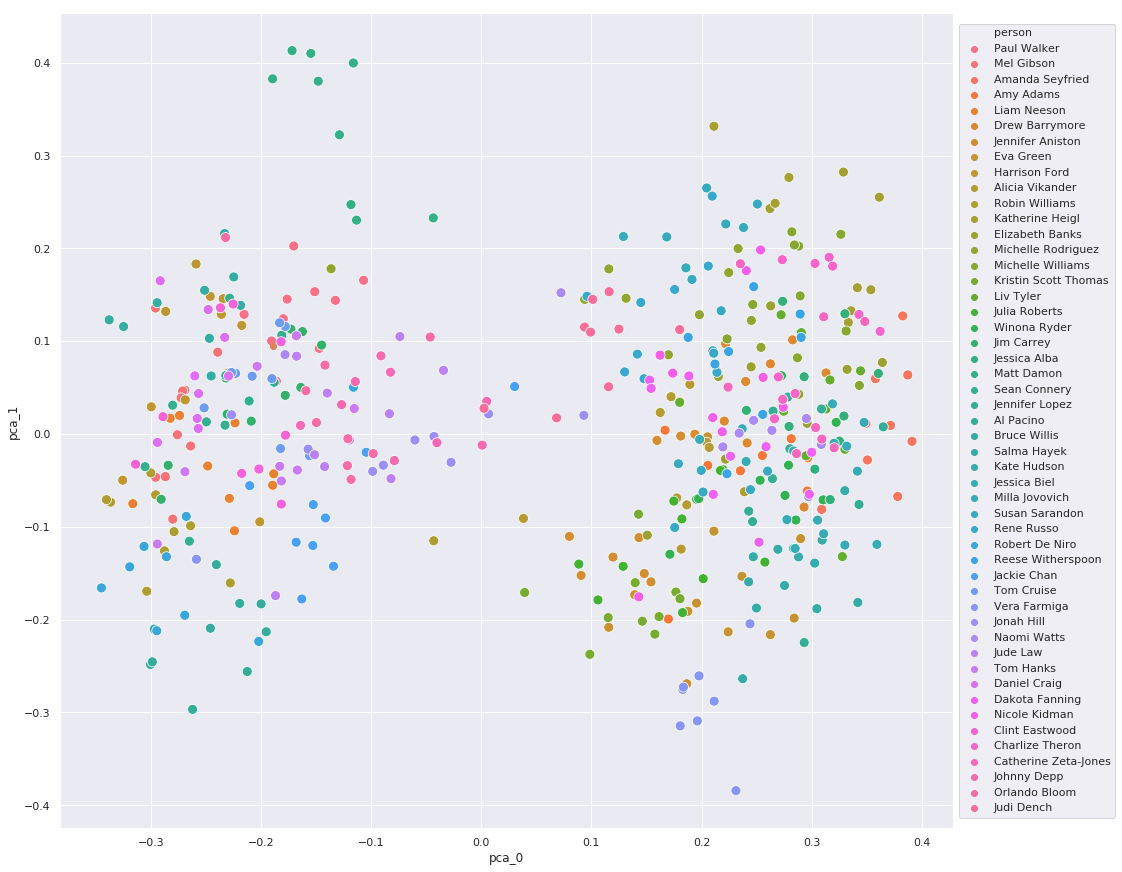

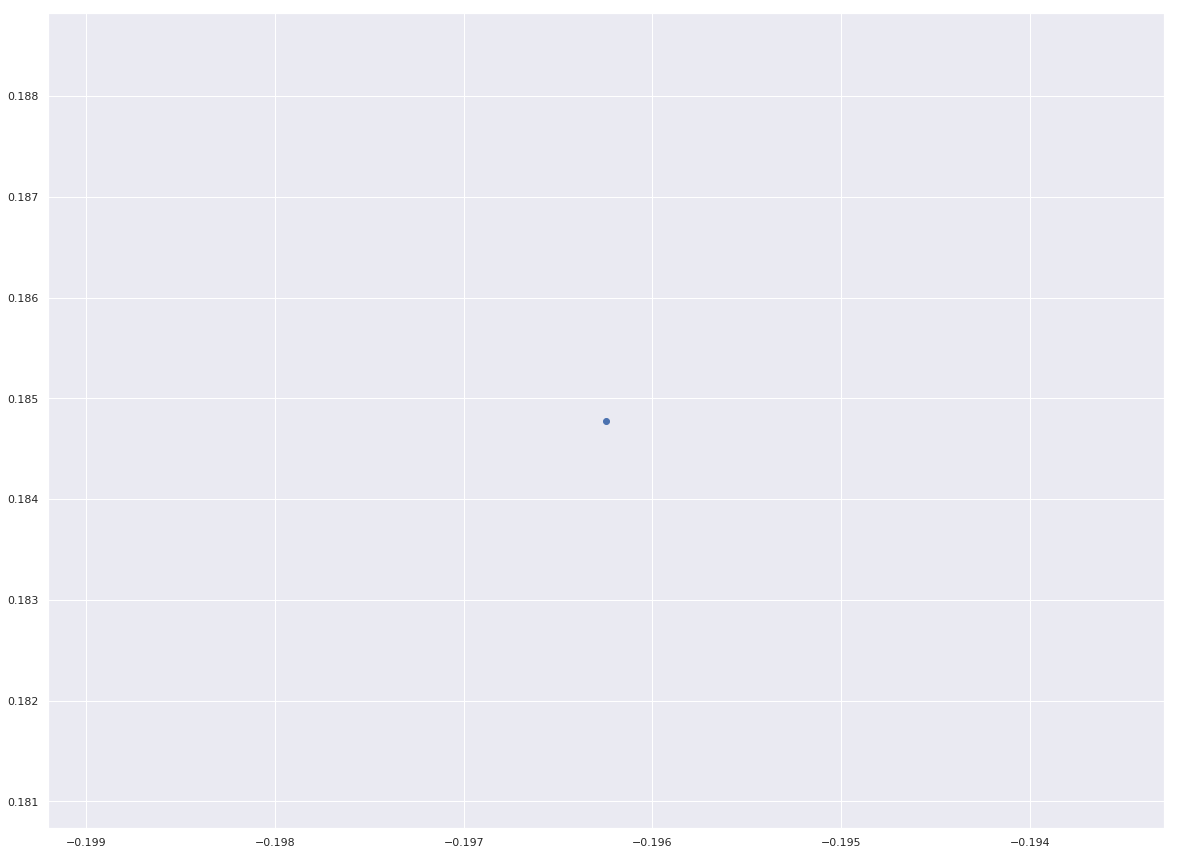

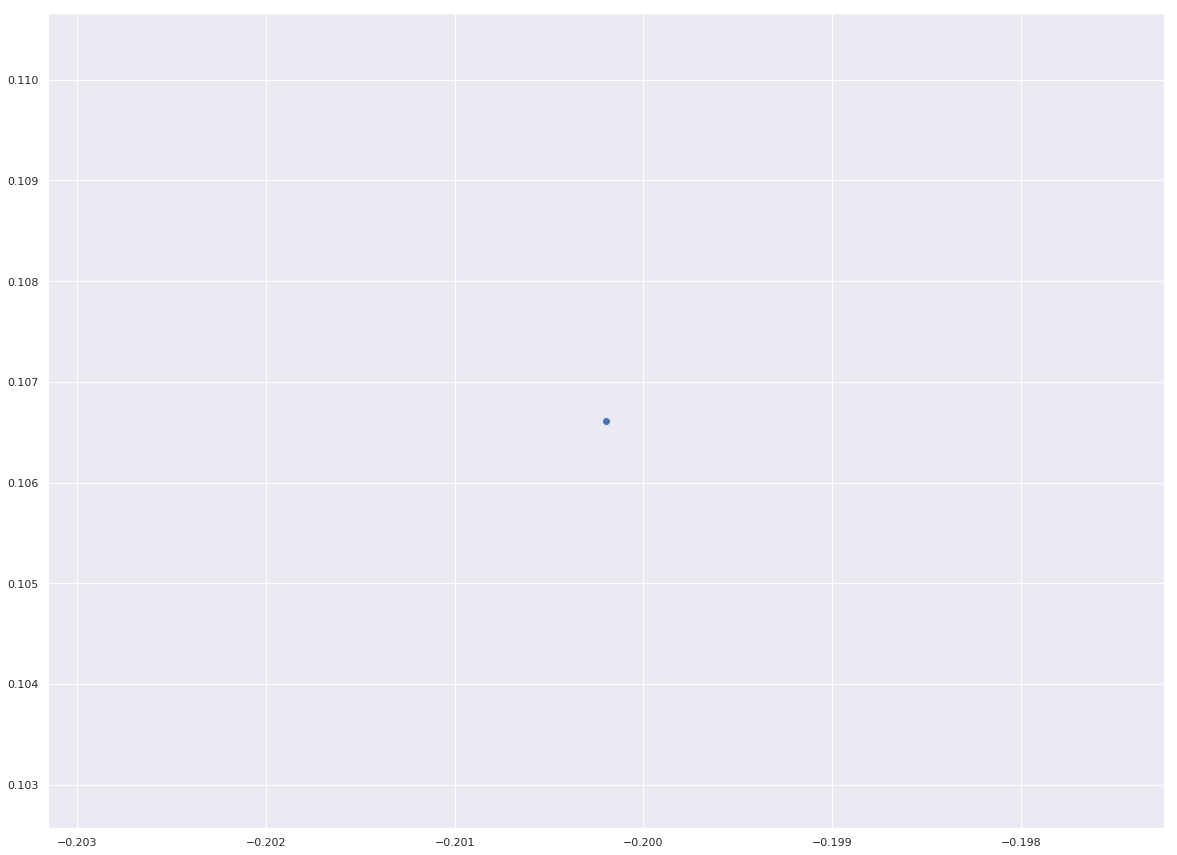

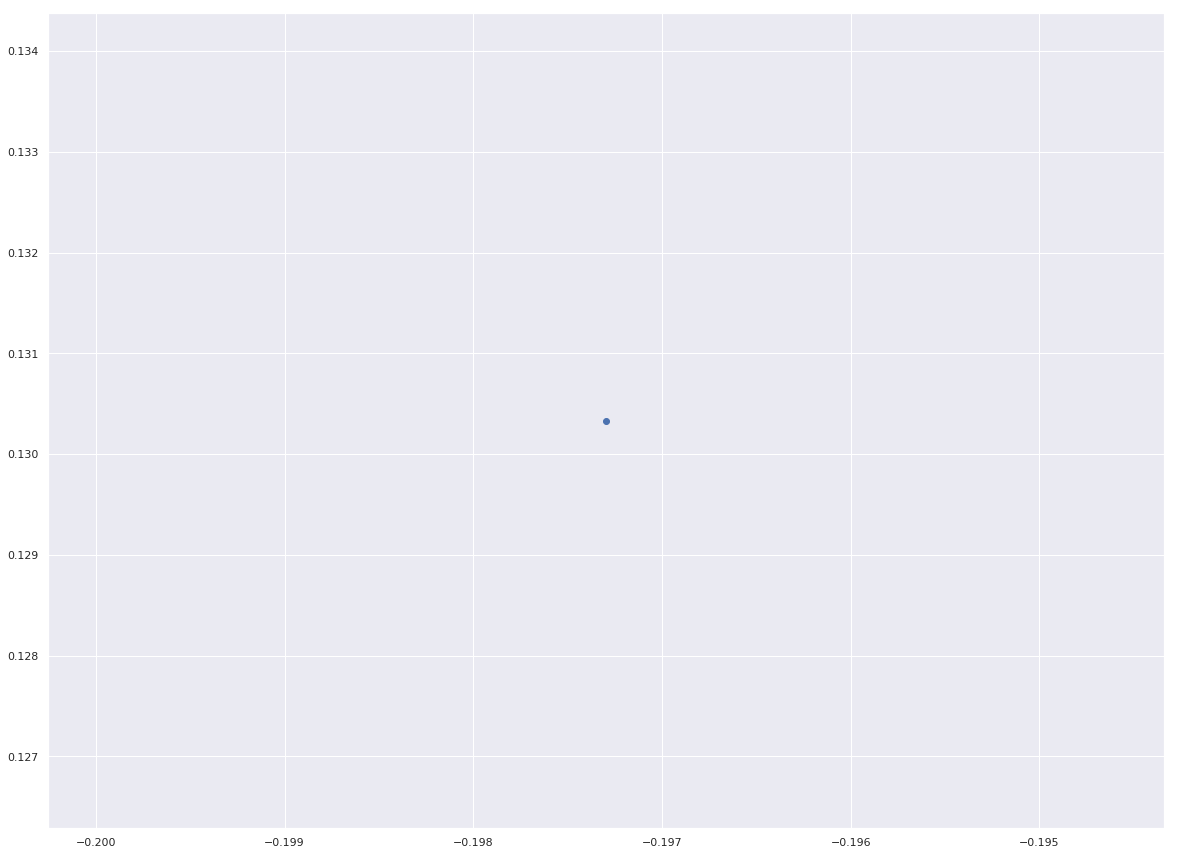

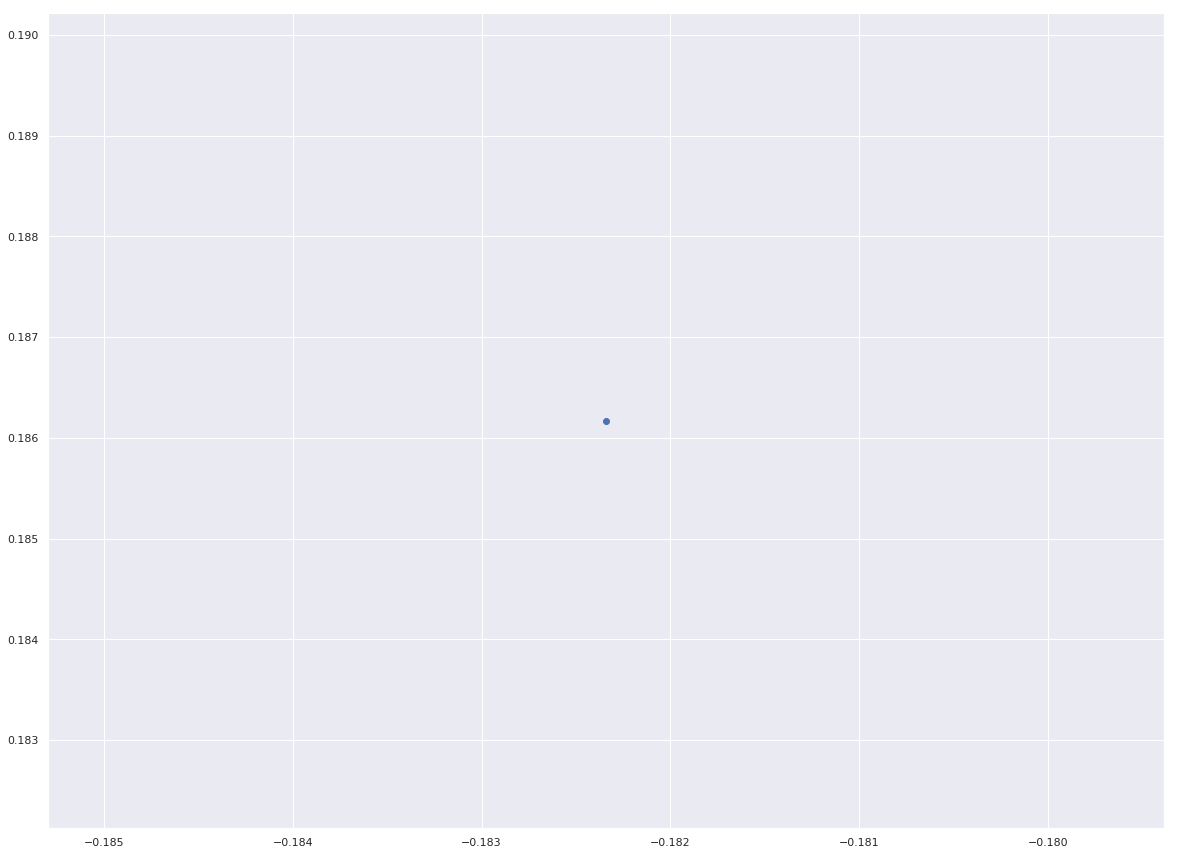

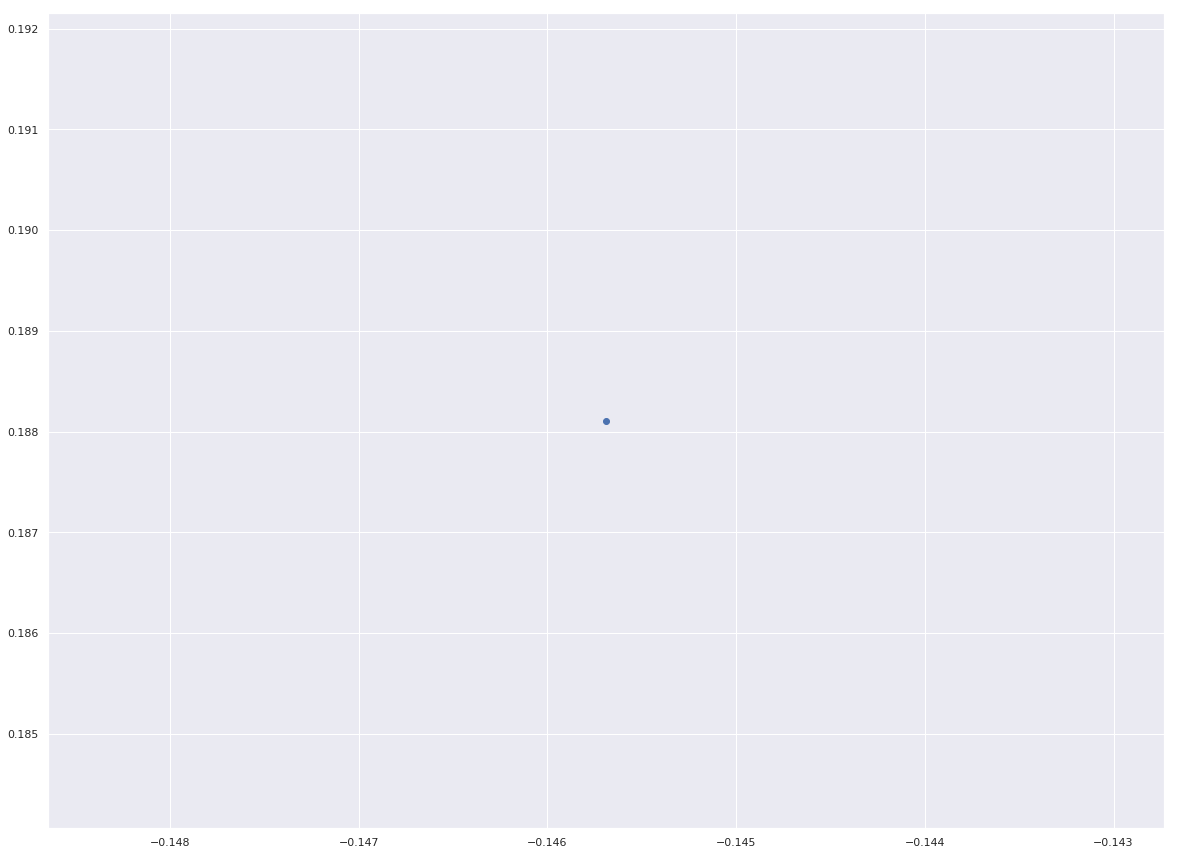

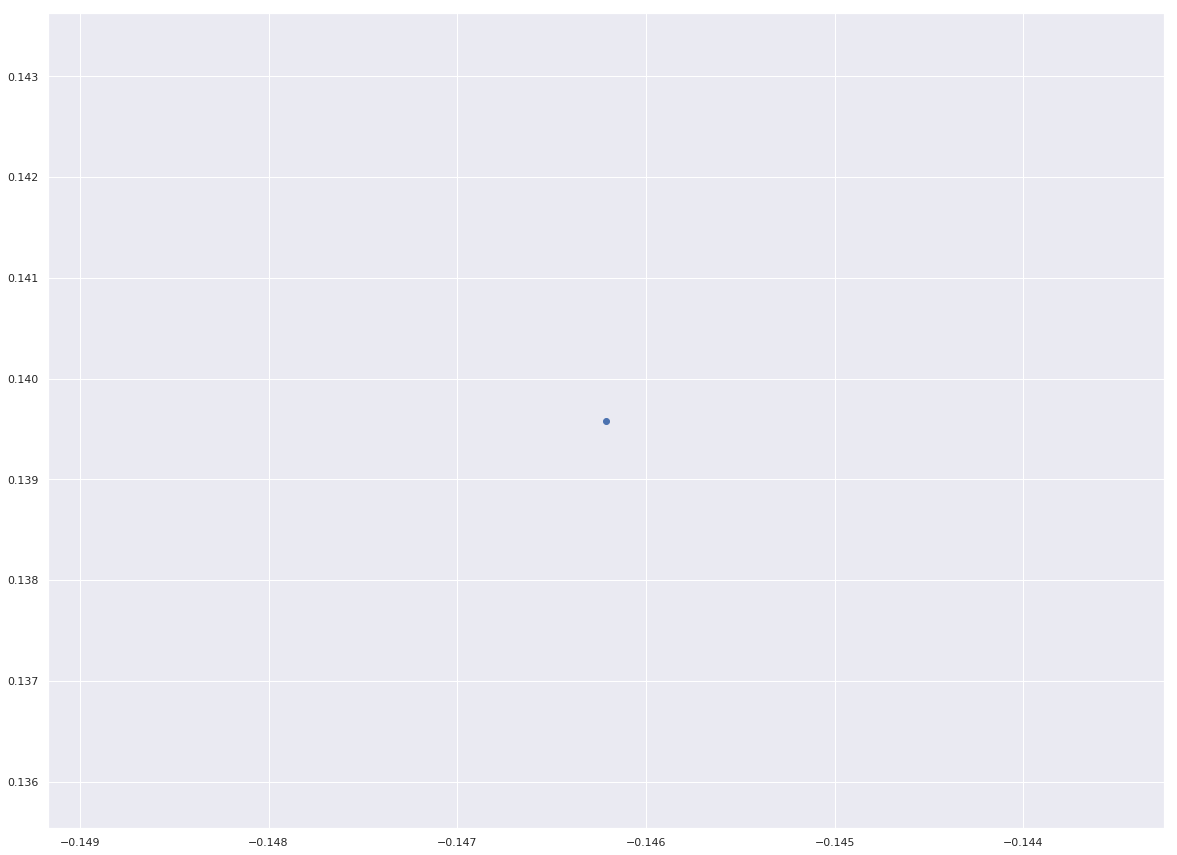

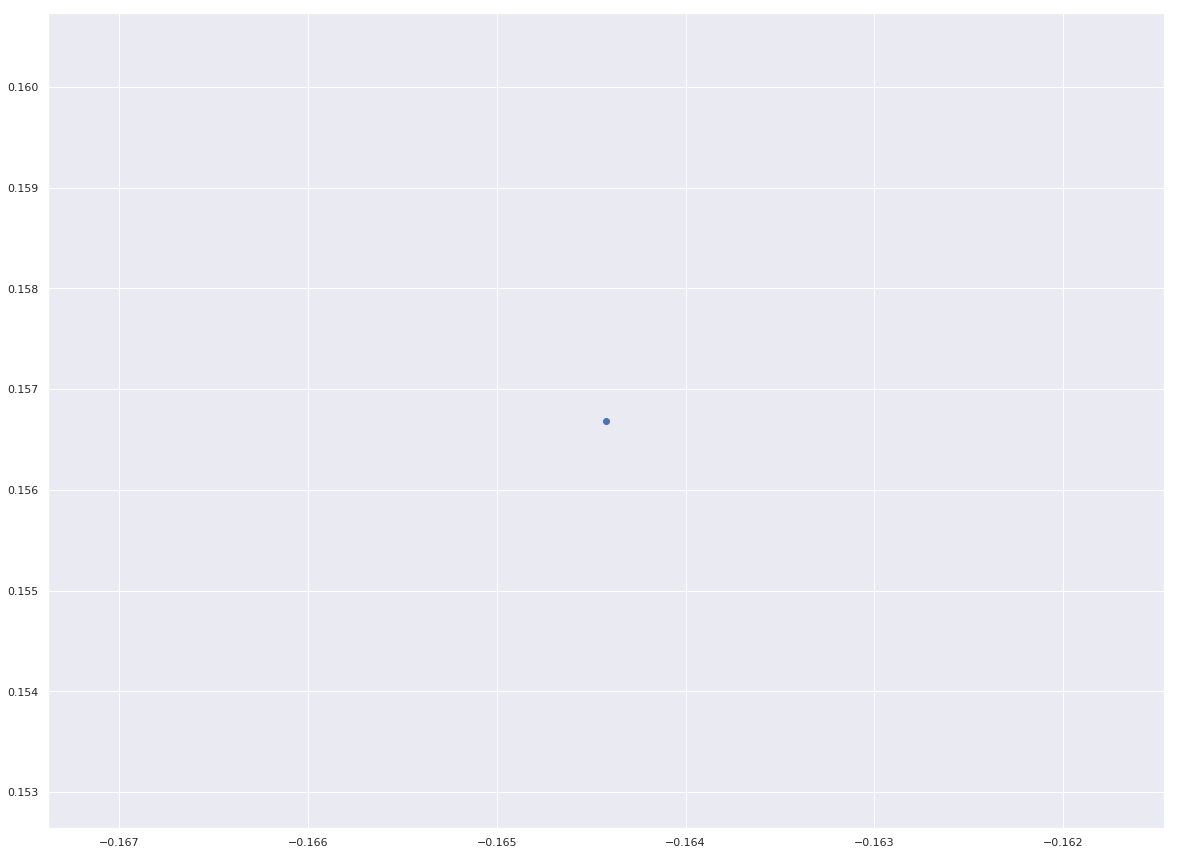

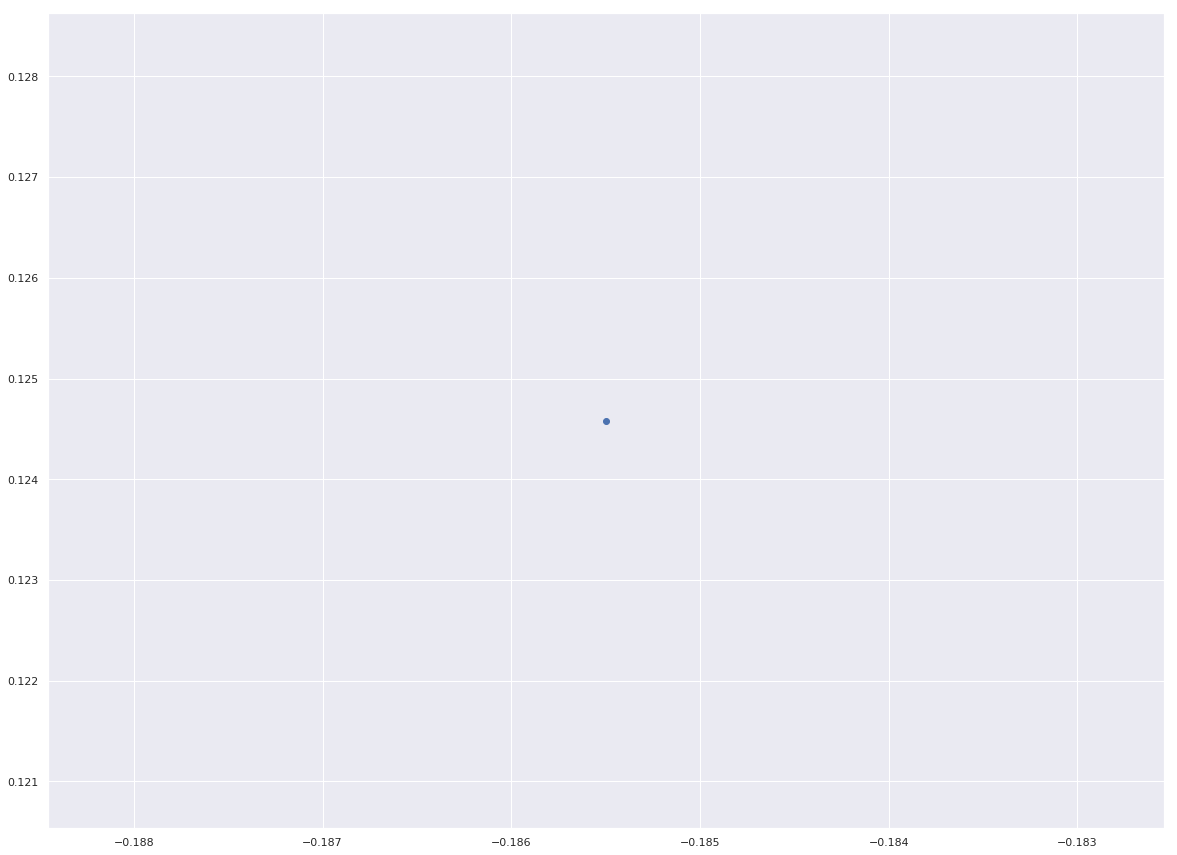

IndexError: single positional indexer is out-of-bounds

In [61]:
sns.set(rc={'figure.figsize':(20,15)})
ax = sns.scatterplot(data=top_pca, x='pca_0', y='pca_1', hue='person', s=100)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ion()

for i in range(10):
    plt.scatter(webcam_pca.iloc[i, 1], webcam_pca.iloc[i, 2])
    plt.pause(0.5)

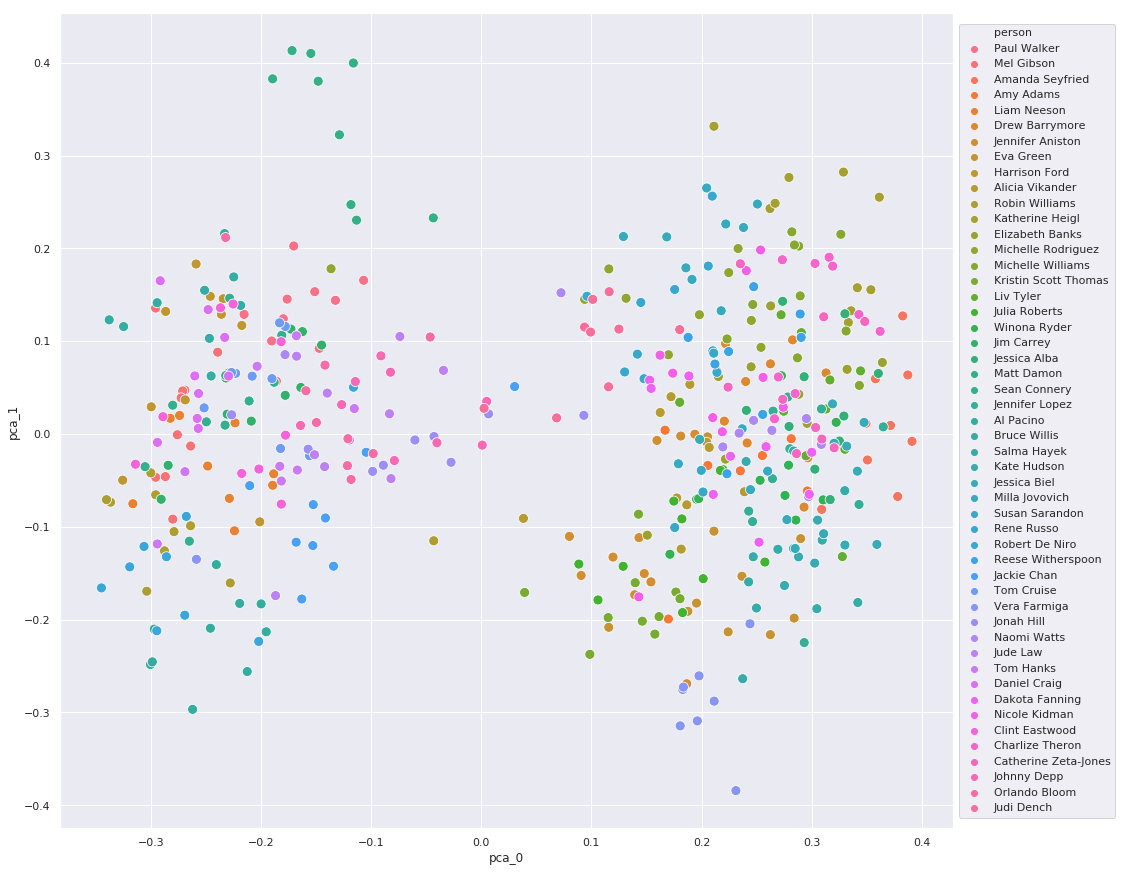

In [48]:
import matplotlib.pyplot as plt
import time
import random
 
xdata = []
ydata = []
to_plot = pd.DataFrame()

sns.set(rc={'figure.figsize':(20,15)})
ax = sns.scatterplot(data=top_pca, x='pca_0', y='pca_1', hue='person', s=100)
 
# axes = plt.gca()
# axes.set_xlim(0, 100)
# axes.set_ylim(-50, +50)
# ax2 = sns.scatterplot(data=webcam_pca,  x='pca_0', y='pca_1', marker='^', s=200)
ax2 = sns.scatterplot(x=xdata, y=ydata, marker='^', s=200)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# for i in range(10):
#     xdata.append(webcam_pca.iloc[i, 1])
#     ydata.append(webcam_pca.iloc[i, 2])
#     ax2.set_xdata(xdata)
#     ax2.set_ydata(ydata)
#     plt.draw()
#     plt.pause(1)
# time.sleep(0.1)
plt.show()